In [96]:
from xml.dom.minidom import Document
from pymongo import MongoClient
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def mongoimport(csv_path):
    # Documents - Data in MongoDB is called as Documents
    AL_df = pd.read_csv(csv_path)
    airDelay = json.loads(AL_df.to_json(orient = 'records'))
    collection.insert_many(airDelay)
    
    series = read_csv('C:\\Flights_Delay.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    series.plot()
    plt.show()

if __name__ == "__main__":
    client = MongoClient("mongodb://localhost:27017")
    # First Create Database
    db = client['airline_delayDB']
    # Collection
    collection = db['flights']
    # Import dataframe to mongodb documents
    mongoimport('C:\\Flights_Delay.csv')


NameError: name 'read_csv' is not defined

In [98]:
  # b) Average arrival delay caused by airlines
print('\n#b) Average arrival delay caused by airlines: ')
    
avg_delay=collection.aggregate([{'$group':{'_id':{},'avgFlightDelay':
                            {'$avg':'$ARRIVAL_DELAY'}}},{'$project':{'_id':0}}])
for i in avg_delay:
    print(i)


#b) Average arrival delay caused by airlines: 
{'avgFlightDelay': 7.545457931394093}


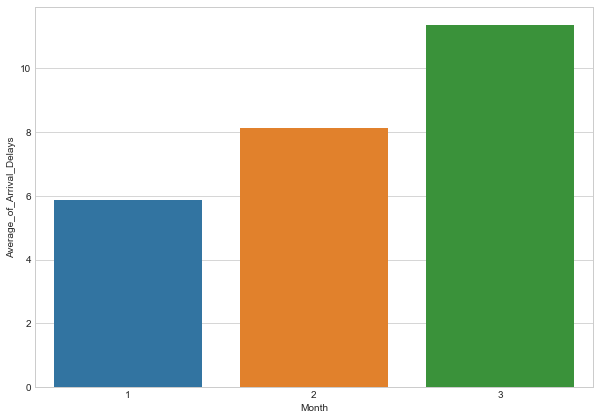

In [48]:
 #c) Days of months with respect to average of arrival delays.
        
#avg_arrival_days=collection.aggregate([{'$group': {'_id':'$DAY','Avg_Days_Delay':{'$avg':'$ARRIVAL_DELAY'}}}, {'$sort':{'Avg_Days_Delay':-1}}])

avg_arrival_days = collection.aggregate([
        {'$group':{'_id' : '$MONTH', 'Average_of_Arrival_Delays':{'$avg':'$ARRIVAL_DELAY'}}},
        {'$sort' : {'MONTH':-1}}
        ])

avg_arrival_days_df=pd.DataFrame(avg_arrival_days)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(x=avg_arrival_days_df['_id'],y=avg_arrival_days_df['Average_of_Arrival_Delays'], 
            order=avg_arrival_days_df['_id'].sort_values(ascending = True))
plt.xlabel('Month')
plt.show()

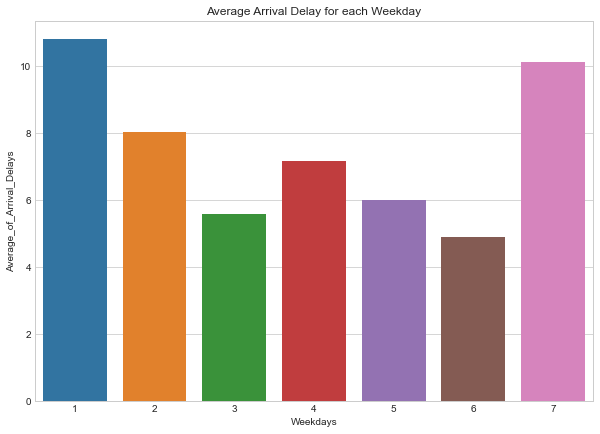

In [49]:
   #d Arrange weekdays with respect to the average arrival days caused. 
  
avg_arrival_weekdays=collection.aggregate ([
        {'$group':{'_id' : '$DAY_OF_WEEK', 'Average_of_Arrival_Delays':{'$avg':'$ARRIVAL_DELAY'}}},
        {'$sort' : {'Average_of_Arrival_Delays':-1}}
        ])   

avg_arrival_weekdays_df=pd.DataFrame(avg_arrival_weekdays)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=avg_arrival_weekdays_df['_id'],y=avg_arrival_weekdays_df['Average_of_Arrival_Delays'],order=avg_arrival_weekdays_df['_id'].sort_values(ascending = True) )
plt.title('Average Arrival Delay for each Weekday')
plt.xlabel('Weekdays')
plt.show()

In [61]:
    #e) Arrange Days of month as per cancellations done in descending order.  
 

days_per_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},{'$group':{'_id' :{'Month':'$MONTH','Count':'$Count'}, 'Count':{'$sum':1}}},
                                     {'$sort':{'Count': -1}}])
    
days_per_cancellation_df=pd.DataFrame(days_per_cancellation)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=days_per_cancellation_df['_id'],y=days_per_cancellation_df['Count'])#,order=days_per_cancellation_df['_id'].sort_values(ascending = True))
plt.title('Days of Month as per Cancellations in Descending Order')
plt.xlabel('Days of Month')
plt.show()
    

TypeError: unhashable type: 'dict'

<Figure size 720x504 with 0 Axes>

In [75]:
 #f) Find the busiest airports with respect to day of week. Create a suitable plot using matplotlib/seaborn.
'''
arrival_airport_count=collection.aggregate([{'$group':{'_id':'$DAY_OF_WEEK'
                                              ,'count':{'$count':{}}}},
                                            {'$sort':{'DESTINATION_AIRPORT': -1}}])
'''
arrival_airport_count=collection.aggregate([
                                            {'$group':{'_id':'Destination':'$DESTINATION_AIRPORT','No_of_Day_ofWeek':'$DAY_OF_WEEK','count':{'$count':{}}}},
                                            #{'$sort':{'DESTINATION_AIRPORT': 1}}
                                        ])


arrival_airport_count_df=pd.DataFrame(arrival_airport_count)
    
#dict1=arrival_airport_count_df.to_dict()
print(arrival_airport_count_df)#['count'].sort_values(ascending = False))


arrival_airport_count_df=pd.DataFrame(arrival_airport_count)
#avg_arrival_weekdays_df=pd.DataFrame(avg_arrival_weekdays)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=arrival_airport_count_df['_id'],y=arrival_airport_count_df['count'],order=arrival_airport_count_df['_id'].value_counts().index )
plt.title('Average Arrival Delay for each Weekday')
plt.xlabel('Weekdays')
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_14392/3431540048.py, line 8)

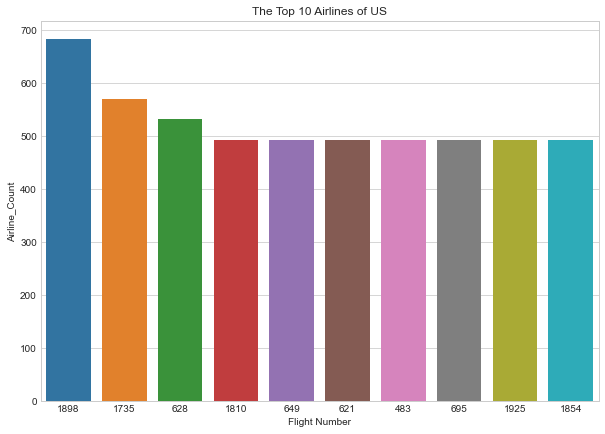

In [94]:
    #g Find top 10 Airlines of US. Create a suitable plot using matplotlib/seaborn.
 
top_US_airlines = collection.aggregate([{ '$match':{'AIRLINE':"US"}},
                                        {'$group' :{'_id' : '$FLIGHT_NUMBER', 'Airline_Count':{'$count' : {}}}},
                                            {'$sort':{'Airline_Count':-1}},
                                            {'$limit':10}])
    
airline_df=pd.DataFrame(top_US_airlines)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=airline_df['_id'],y=airline_df['Airline_Count'])
plt.title('The Top 10 Airlines of US')
plt.xlabel('Flight Number')
plt.show()

In [78]:
#h) Finding airlines that make the maximum, minimum number of cancellations.
    
min_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},
                                   {'$group':{'_id':'$AIRLINE',
                                    'min_no_of_cancellations':{'$count':{}}}},
                                   {'$sort':{'min_no_of_cancellations': 1}}, {'$limit':1}
                                         ])
    
max_cancellation = collection.aggregate([{'$match' : {'CANCELLED':1}},
                                   {'$group':{'_id':'$AIRLINE',
                                  'max_no_of_cancellations':{'$count':{}}}},
                                  {'$sort':{'max_no_of_cancellations': -1}}, {'$limit':1}
                                        ])
for i in min_cancellation:
        print(i)
for i in max_cancellation:
        print(i)

{'_id': 'HA', 'min_no_of_cancellations': 114}
{'_id': 'MQ', 'max_no_of_cancellations': 15732}


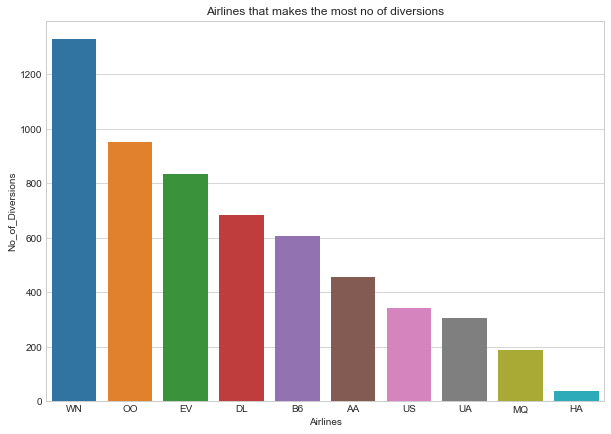

In [82]:
   # i) Find and show airlines names in descending that make the most number of diversions made.
     
airline_diversions = collection.aggregate([{'$match' : {'DIVERTED':1}},
                                    {'$group':{'_id':'$AIRLINE',
                                 'No_of_Diversions':{'$count':{}}}},
                                {'$sort':{'No_of_Diversions': -1}}])
    
    
airline_diversion_df=pd.DataFrame(airline_diversions)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.barplot(x=airline_diversion_df['_id'],y=airline_diversion_df['No_of_Diversions'])
plt.title('Airlines that makes the most no of diversions')
plt.xlabel('Airlines')
plt.show()

In [83]:
    #j) Finding days of month that see the most number of diversion
no_of_diversions = collection.aggregate([{'$match' : {'DIVERTED':1}},
                                     {'$group':{'_id':'$DAY',
                                     'No_of_Diversions':{'$count':{}}}},
                                     {'$sort':{'No_of_Diversions': -1}},{'$limit':1}
                                           ]) 
for i in no_of_diversions:
         print(i)

{'_id': 2, 'No_of_Diversions': 570}


In [84]:
    #k) Calculating mean and standard deviation of departure delay for all flights in minutes
departure_delay = collection.find({},{'DEPARTURE_DELAY':1,'_id':0})
    
departure_delay_df=pd.DataFrame(departure_delay)
print("Mean:",departure_delay_df.mean())
print("Standard Deviation:",departure_delay_df.std())

Mean: DEPARTURE_DELAY    11.329091
dtype: float64
Standard Deviation: DEPARTURE_DELAY    39.620558
dtype: float64


In [85]:
#l) Calculating mean and standard deviation of arrival delay for all flights in minutes
arrival_delay = collection.find({},{'ARRIVAL_DELAY':1,'_id':0})
    
arrival_delay_df=pd.DataFrame(arrival_delay)
print("Mean:",arrival_delay_df.mean())
print("Standard Deviation:",arrival_delay_df.std())

Mean: ARRIVAL_DELAY    7.545458
dtype: float64
Standard Deviation: ARRIVAL_DELAY    42.378002
dtype: float64


In [89]:
  #m)	Create a partitioning table “flights_partition” using partitioned by schema “CANCELLED”


In [92]:
#n) Finding all diverted Route from a source to destination Airport & which route is the most diverted route.
no_of_diversions=collection.aggregate([{'$match':{'DIVERTED':1}},
                                    {'$group' :{'_id' : {'ORIGIN_AIRPORT':'$ORIGIN_AIRPORT',"DESTINATION_AIRPORT":'$DESTINATION_AIRPORT'},
                                               'Most_Deversions_Count':{'$sum':1}}},
                                    {'$sort':{'Most_Deversions_Count':-1}}                    ])
no_of_diversions_df=pd.DataFrame(no_of_diversions)
diversions_max=no_of_diversions_df.get('Most_Deversions_Count').max()
    
print(no_of_diversions_df[no_of_diversions_df['Most_Deversions_Count']==diversions_max]['_id'])

0    {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT...
1    {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT...
2    {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT...
3    {'ORIGIN_AIRPORT': 'STT', 'DESTINATION_AIRPORT...
4    {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT...
5    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
6    {'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT...
7    {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT...
8    {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT...
Name: _id, dtype: object


In [88]:
#o) When is the best time of day/day of week/time of year to fly with minimum delay
total_delay=collection.aggregate([{'$group':{'_id':'$_id','total':{'$sum':'$ARRIVAL_DELAY'}}},{'$sort': {'total':1}},
                                  {'$limit':1}])
for i in total_delay:
 print(i)

{'_id': ObjectId('6368aa09710601f7a6b9df2c'), 'total': -76.0}
